In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_days_since_vacc_start(string):
    dt_start = datetime(2021, 1, 1)
    dt_now = datetime.strptime(string, "%Y-%m-%d")
    n_days = (dt_now - dt_start).days
    return n_days

In [3]:
df = pd.read_csv('vaccination.csv')
df.dtypes

Unnamed: 0                   int64
country                     object
date                        object
people_fully_vaccinated    float64
daily_vaccinations         float64
dtype: object

In [4]:
df['n_days'] = list(map(get_days_since_vacc_start, df['date']))
# df['daily_vaccinations'] = df['daily_vaccinations'].apply(lambda x: x*100000)

df_switzerland = df[df.country == 'Switzerland']
df_switzerland['daily_vaccinations'] = df_switzerland['daily_vaccinations'].apply(lambda x: x/86.37000)

df_germany = df[df.country == 'Germany']
df_germany['daily_vaccinations'] = df_germany['daily_vaccinations'].apply(lambda x: x/832.40000)

df_france = df[df.country == 'France']
df_france['daily_vaccinations'] = df_france['daily_vaccinations'].apply(lambda x: x/673.90000)

df_india = df[df.country == 'India']
df_india['daily_vaccinations'] = df_india['daily_vaccinations'].apply(lambda x: x/13800.00000)

In [5]:
df_daily_vaccinations = df.groupby('n_days')
df_daily_vaccinations_mean = df_daily_vaccinations.mean()
df_daily_vaccinations_sem = df_daily_vaccinations.sem()
n_days = list(df_daily_vaccinations.groups.keys())
y = df_daily_vaccinations_mean['daily_vaccinations']
sem = df_daily_vaccinations_sem['daily_vaccinations']

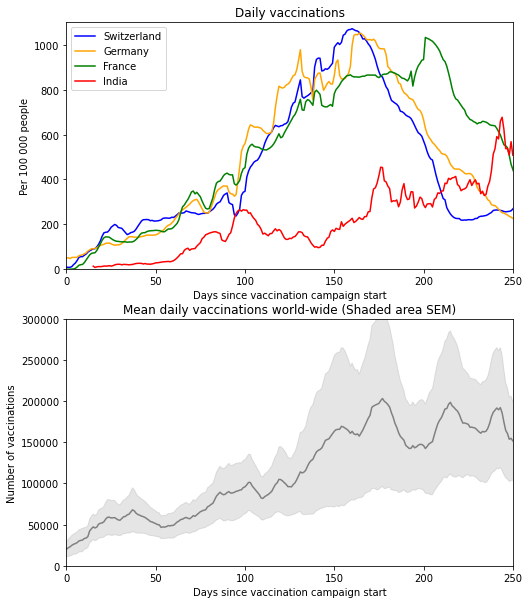

In [8]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))

# Daily Vaccinations Plot
ax1.set_ylim(0,1100)
ax1.set_xlim(0,  250)
ax1.set_title('Daily vaccinations')
ax1.set_ylabel('Per 100 000 people')
ax1.set_xlabel('Days since vaccination campaign start')

sns.lineplot(data=df_switzerland, x='n_days', y='daily_vaccinations', 
             color='blue', ax=ax1, label='Switzerland')
sns.lineplot(data=df_germany, x='n_days', y='daily_vaccinations', 
             color='orange', ax=ax1, label='Germany')
sns.lineplot(data=df_france, x='n_days', y='daily_vaccinations', 
             color='green', ax=ax1, label='France')
sns.lineplot(data=df_india, x='n_days', y='daily_vaccinations', 
             color='red', ax=ax1, label='India')
ax1.legend(loc = 'upper left')

ax2.set_ylim(0,300000)
ax2.set_xlim(0,250)
ax2.set_ylabel('Number of vaccinations')
ax2.set_xlabel('Days since vaccination campaign start')
ax2.set_title('Mean daily vaccinations world-wide (Shaded area SEM)')
ax2.plot(n_days, y, color='grey')
ax2.fill_between(n_days, y - sem, y + sem, color='grey', alpha=0.2)

In [9]:
fig.savefig('Graphs.pdf', format='pdf')